# Salary Prediction

TODO: Model Selection (experiment with lots of models and choose the best model)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## Data Wrangling

In [9]:
df = pd.read_csv('../datasets/salary/Salary Data.csv')

In [11]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [4]:
df[df.isnull().any(axis=1)]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.dropna(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 373 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 20.4+ KB


In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

In [9]:
df.size

1944

In [10]:
cat_cols = df.select_dtypes(include=['object']).columns

In [11]:
cat_cols

Index(['Gender', 'Education Level', 'Job Title'], dtype='object')

In [12]:
df['Job Title'].nunique()

174

In [13]:
df['Job Title'].value_counts().nlargest(5)

Job Title
Director of Operations      9
Director of Marketing       8
Senior Marketing Manager    8
Senior Project Manager      7
Senior Business Analyst     6
Name: count, dtype: int64

In [14]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
348,28.0,Female,Bachelor's,Junior Operations Manager,1.0,35000.0
349,36.0,Male,Bachelor's,Senior Business Development Manager,8.0,110000.0
350,44.0,Female,PhD,Senior Data Scientist,16.0,160000.0
351,31.0,Male,Bachelor's,Junior Marketing Coordinator,3.0,55000.0


### 

### does education affect salary?

<Axes: xlabel='Salary', ylabel='Education Level'>

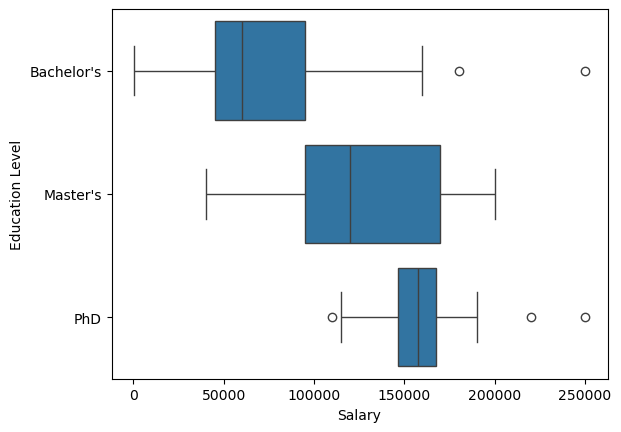

In [15]:
import seaborn as sns

sns.boxplot(data=df, x='Salary', y='Education Level')

## Regression with: `x=Age` and `y=Salary`

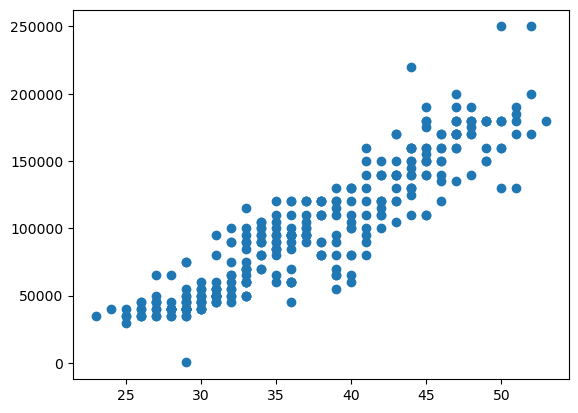

In [16]:
x = df[['Age']]
y = df['Salary']

plt.scatter(x, y)
plt.show()

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((259, 1), (65, 1), (259,), (65,))

In [18]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x_train, y_train)

LinearRegression()

In [19]:
lr.score(x_test, y_test) # R-squared (coefficient of determination)

0.8351020158618555

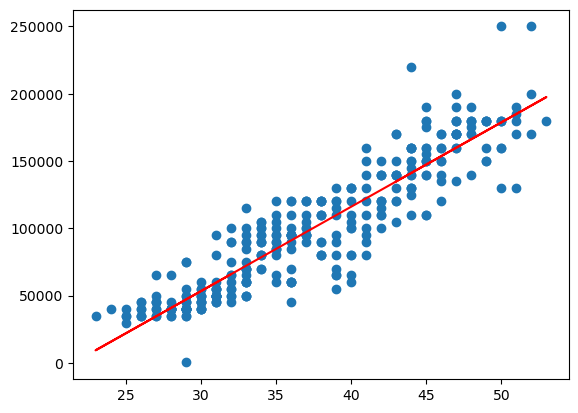

In [20]:
# plot the regression line with the data point
plt.scatter(x, y)
plt.plot(x, lr.predict(x), color='red')
plt.show()

### Years of experience

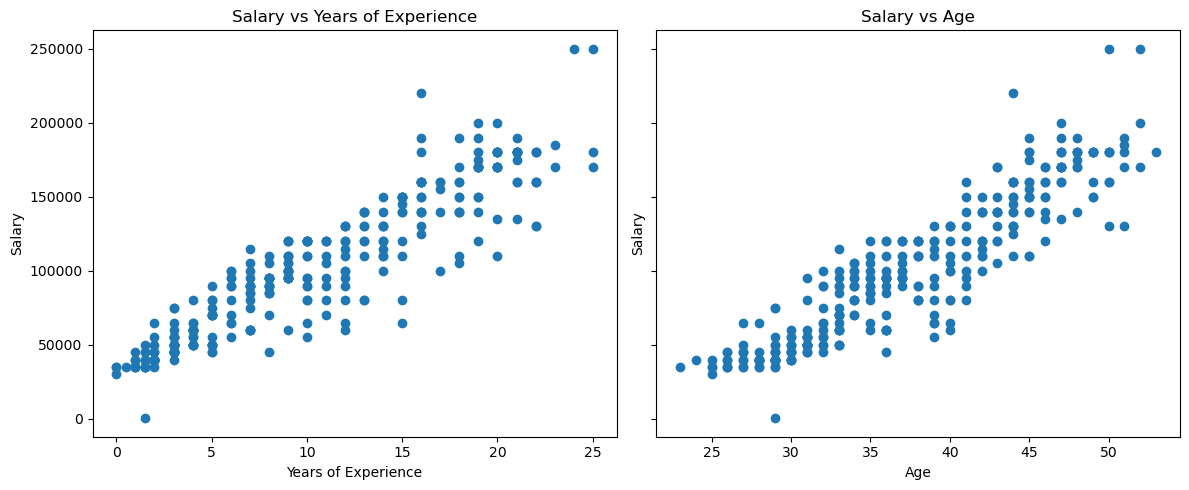

<Figure size 640x480 with 0 Axes>

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Years of Experience plot
ax1.scatter(df['Years of Experience'], df['Salary'])
ax1.set_xlabel('Years of Experience')
ax1.set_ylabel('Salary')
ax1.set_title('Salary vs Years of Experience')

# Age plot 
ax2.scatter(df['Age'], df['Salary'])
ax2.set_xlabel('Age')
ax2.set_ylabel('Salary')
ax2.set_title('Salary vs Age')

plt.tight_layout()
plt.show()

# Reset plot settings for next plot
plt.clf()

### Regression with two variables: `Age` and `Experience`

In [22]:
x = df[['Age', 'Years of Experience']]
y = df['Salary']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((259, 2), (65, 2), (259,), (65,))

In [23]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x_train, y_train)

LinearRegression()

In [24]:
lr.score(x_test, y_test)

0.8525276864529964

### Aside: what does scaling means?

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().set_output(transform="pandas")
df_scaled = scaler.fit_transform(df[['Salary', 'Years of Experience']])

We can filter the dataframe using scaled values to get an idea:

- Where `Salary > 90%` in its range.
- Where `Experience > 90%` in its range.

We can easily express that, and it is easier to the model to see it.

In [26]:
df[df_scaled['Salary'] > 0.90]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
30,50.0,Male,Bachelor's,CEO,25.0,250000.0
83,52.0,Male,PhD,Chief Technology Officer,24.0,250000.0


In [27]:
df[df_scaled['Years of Experience'] > 0.90]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
30,50.0,Male,Bachelor's,CEO,25.0,250000.0
60,51.0,Female,Master's,Director of Operations,23.0,170000.0
83,52.0,Male,PhD,Chief Technology Officer,24.0,250000.0
93,52.0,Female,Master's,Senior Marketing Manager,25.0,170000.0
121,53.0,Male,Master's,Director of Marketing,25.0,180000.0
158,51.0,Female,PhD,Director of Human Resources,23.0,185000.0


In [28]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv.fit_transform(df['Job Title']).toarray().shape


(324, 85)

## Regression with numerical and categorical variables

In [29]:
x = df[['Age', 'Years of Experience', 'Gender', 'Education Level', 'Job Title']]
y = df['Salary']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((259, 5), (65, 5), (259,), (65,))

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler # Linear Scaling
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
# from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

from sklearn.linear_model import SGDRegressor


# Define numeric and categorical columns
numeric_features = ['Age', 'Years of Experience']
categorical_features = ['Gender']
ordinal_features = ['Education Level']
# text_features = ['Job Title']

# Create preprocessors for different column types
numeric_transformer = MinMaxScaler()
categorical_transformer = OneHotEncoder(drop='first')
ordinal_transformer = OrdinalEncoder(
    categories=[["Bachelor's", "Master's", "PhD"]]
)
# text_transformer = [CountVectorizer(), TfidfTransformer()]

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, ordinal_features),
        # ('txt', text_transformer, text_features)
    ])

# Create pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    # ('regressor', LinearRegression()) # Ordinary Least Squares
    ('regressor', SGDRegressor(eta0=0.001, max_iter=20_000)) # Stochastic Gradient Descent
])

# Fit pipeline
X = df[numeric_features +
       categorical_features +
       ordinal_features
    #    text_features
    ]
y = df['Salary']

pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['Age',
                                                   'Years of Experience']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender']),
                                                 ('ord',
                                                  OrdinalEncoder(categories=[["Bachelor's",
                                                                              "Master's",
                                                                              'PhD']]),
                                                  ['Education Level'])])),
                ('regressor', SGDRegressor(eta0=0.001, max_iter=20000))])

In [31]:
len(pipeline.named_steps['preprocessor'].get_feature_names_out())

4

In [32]:
pipeline.score(x_test, y_test)

0.890730266215755

## Feature Selection

1. **Correlation coefficient** (linear relationship)
2. **Mutual information** (non-linear relationship)

Link: https://scikit-learn.org/1.5/modules/feature_selection.html

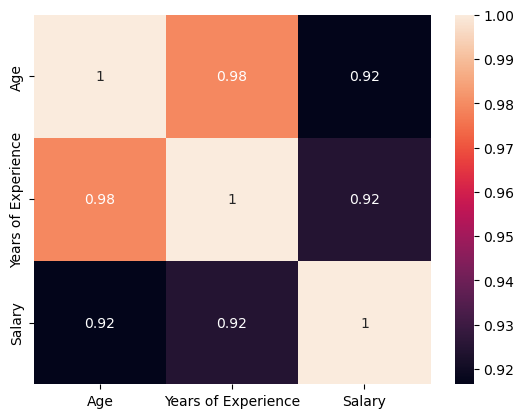

In [33]:
# correlation (correlation coefficient) between numerical features
df[numeric_features + ['Salary']].corr()
sns.heatmap(df[numeric_features + ['Salary']].corr(), annot=True)
plt.show()

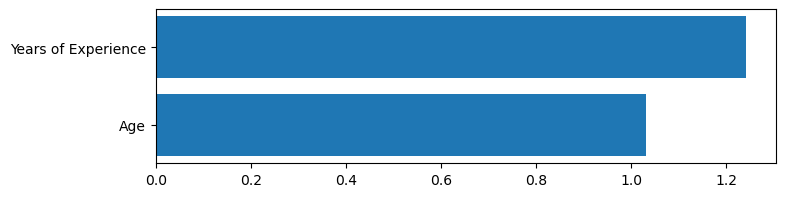

In [34]:
# calculate mutual information between numerical features and salary
from sklearn.feature_selection import mutual_info_regression

mutual_info = mutual_info_regression(df[numeric_features], df['Salary'])
mutual_info
# plot mutual information
plt.figure(figsize=(8, 2))
plt.barh(numeric_features, mutual_info)
plt.show()

## Predict on new samples

In [35]:
x_test = pd.DataFrame({
    'Age': [20],
    'Years of Experience': [100],
    'Gender': ['Male'],
    'Education Level': ["Bachelor's"],
})

In [36]:
pipeline.predict(x_test)

array([333780.26142123])